# 2-Ejercicios

## 2.9 Ejercicios y Problemas

Observa tus comportamientos en casa, en la universidad y en el medio de transporte que utilizas. Encuentra, para cada uno de estos escenarios, sus reglas básicas.

### Comportamientos en la casa

1. **Si hay alguien en tu cuarto y tiene la puerta cerrada**, se debe tocar la puerta y obtener permiso antes de entrar al cuarto.
2. **Al entrar a la casa** se deben quitar los zapatos.
3. **Si son más de las 12 AM**, se debe hacer silencio y tratar de no molestar a las personas que estén tratando de dormir.
4. **Si utilizas algún elemento de la cocina**, hay que lavarlo al terminar.

### Comportamientos en la Universidad

1. **Mientras estás en clase**, silenciar el celular para evitar distraer al profesor o a los otros estudiantes.
2. **Al llegar a clase**, saludar al profesor y a los compañeros.
3. **Durante la clase**, estar atento a lo que se está discutiendo.
4. **Si tienes alguna duda o pregunta**, llamar la atención del profesor de una manera cordial y buscar aclaración sobre la duda/pregunta.

### Comportamientos en el transporte

1. **Al llegar a la estación**, hacer fila para subir al bus.
2. **Cuando el bus llegue**, dejar que primero salgan las personas antes de abordar.
3. **Si estás sentado en el bus**, ceder el asiento a personas que lo necesiten si no hay más sillas.
4. **Al salir del bus y si está muy lleno**, pedir permiso para salir del bus.


# 2. Modelos Netlogo

## CA Stochastic

Este modelo es similar al modelo elemental CA 1D, tiene las mismas reglas pero adicionalmente se añade el hecho de que para cada regla hay una probabilidad asociada. Es decir, que al determinar el próximo estado, no solo se tiene en cuenta los estados de los vecinos en un radio = 1, sino que además existe una posibilidad de que no se ejecute la regla. Esto le añade al modelo un grado de caos y lo vuelve no determinístico. Este modelo se puede usar para modelar comportamientos tales como el crecimiento de cristales y la turbulencia.

Dentro del modelo en Netlogo hay varios ejemplos que muestran unos comportamientos muy interesantes. Primero vemos este, el cual genera una especie de terreno montañoso:





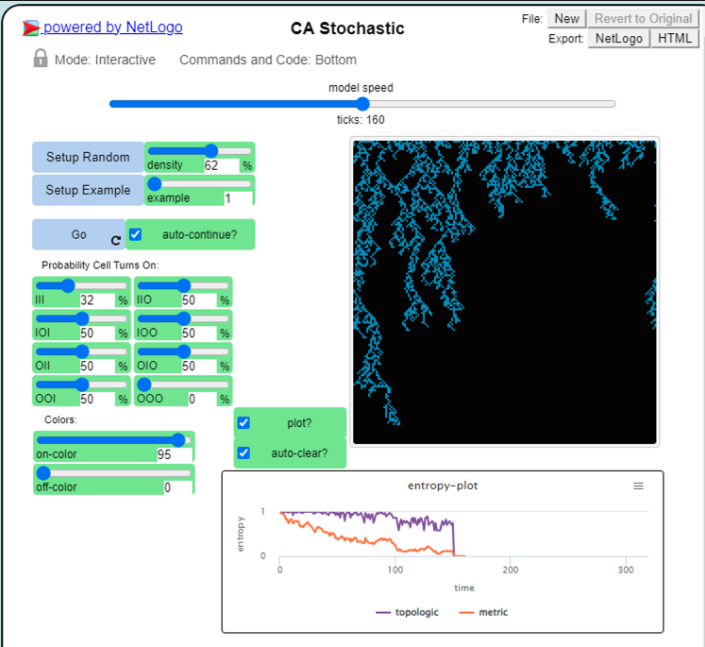

En el ejemplo, al jugar con los valores de la regla I00, observamos que el sistema solo permite que las células se desplacen uniformemente a la izquierda. Este comportamiento ilustra cómo la introducción de probabilidades en las reglas de un autómata celular puede generar patrones complejos y dinámicas no lineales, haciendo que el sistema presente una rica variedad de comportamientos emergentes que pueden ser analógicos a fenómenos naturales como la formación de paisajes.

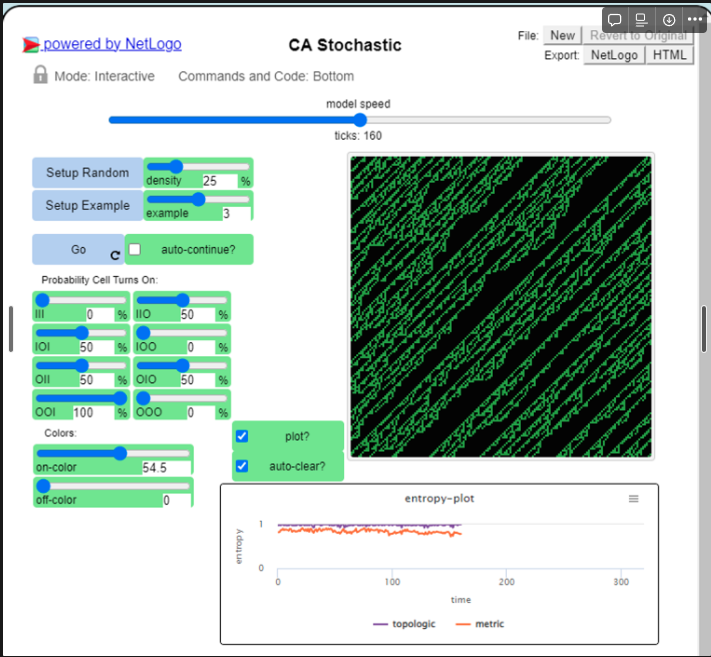

Finalmente observamos el ejemplo 3, el cual me parece el más interesante de todos ya que es una especie de generador de laberintos. Las reglas IOO y OOI en conjunto determinan el grado en que las líneas son horizontales y verticales. 

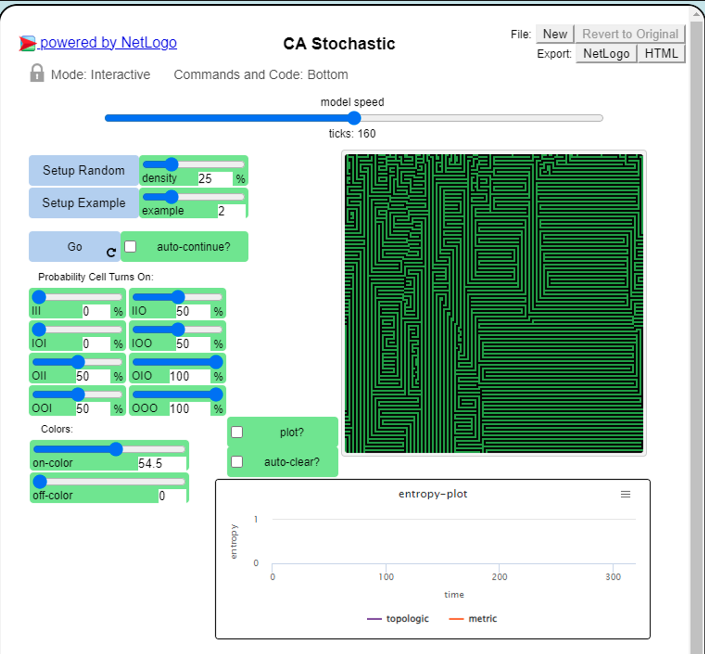

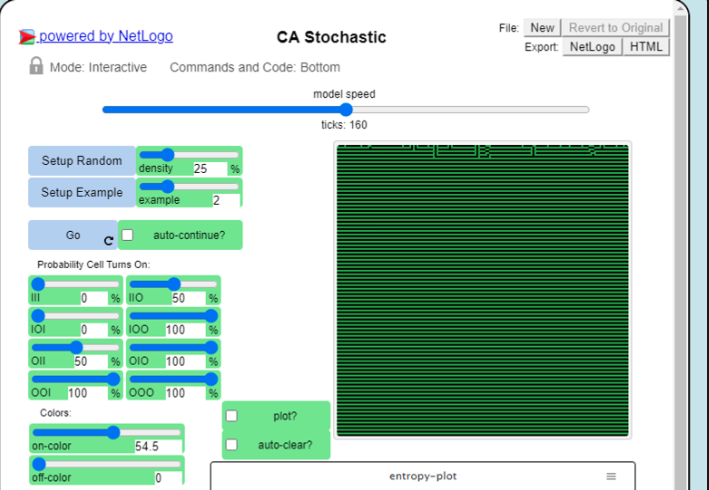

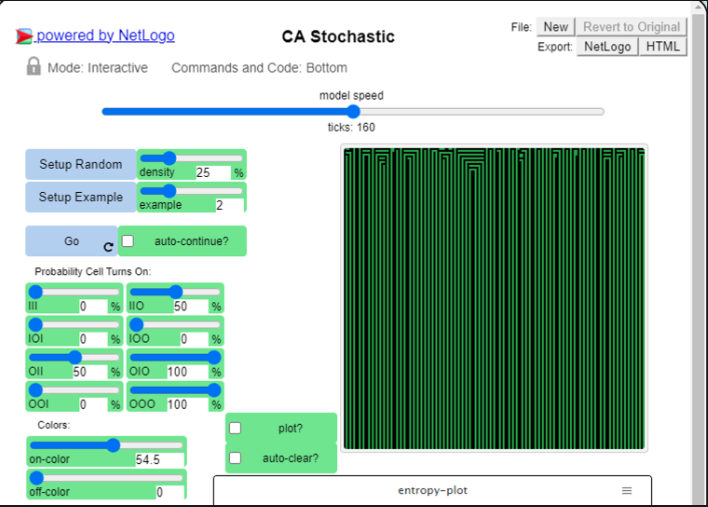

## 4. Diagrama de Voronoi

Tome el plano de una ciudad pequeña y localice, por ejemplo, la droguerías, Es posible que falte alguna en la ciudad? Utilice diagrama de voronoi. 

Localizamos todas la gasolineras en Pereira según Google maps:

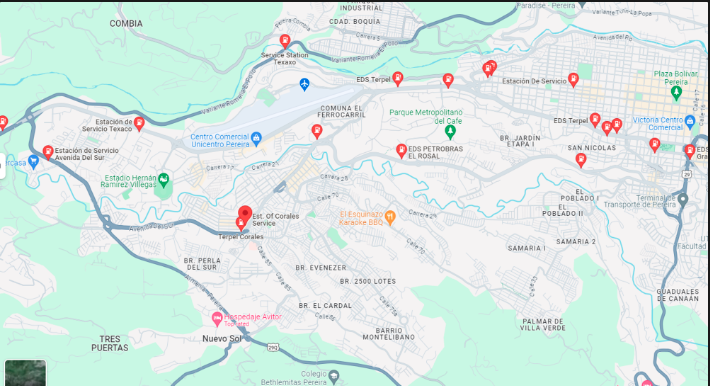

Extraemos los puntos donde están ubicadas la gasolineras y usando hacemos el diagrama de voronoi:

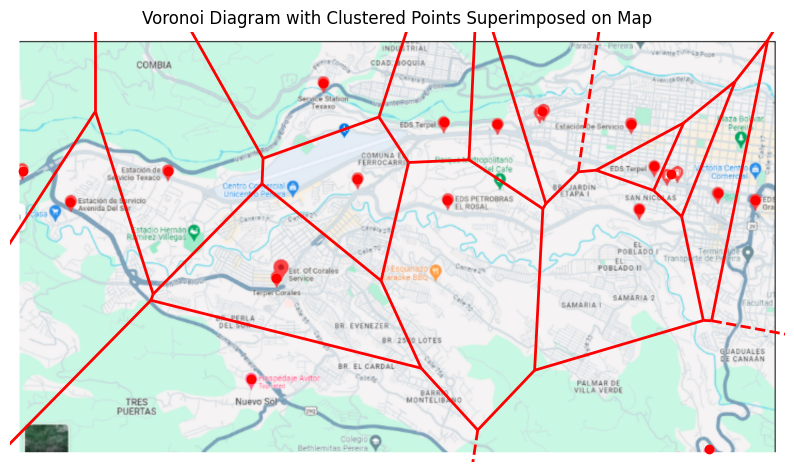

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import DBSCAN

image_path = 'gasStationsPereira.png'
image = Image.open(image_path)

hsv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = [cnt for cnt in contours if 10 < cv2.contourArea(cnt) < 1000]

points_array = np.array([cv2.moments(cnt) for cnt in filtered_contours])
points_array = np.array([(int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"])) for M in points_array if M["m00"] != 0])

dbscan = DBSCAN(eps=15, min_samples=1)
clusters = dbscan.fit_predict(points_array)

clustered_points = []
for cluster in np.unique(clusters):
    points_in_cluster = points_array[clusters == cluster]
    mean_point = np.mean(points_in_cluster, axis=0).astype(int)
    clustered_points.append(tuple(mean_point))

clustered_points_array = np.array(clustered_points)

vor_clustered = Voronoi(clustered_points_array)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)
voronoi_plot_2d(vor_clustered, ax=ax, show_vertices=False, line_colors='red', line_width=2)
for point in clustered_points:
    ax.plot(point[0], point[1], 'ro')
ax.set_xlim([0, image.size[0]])
ax.set_ylim([image.size[1], 0])
ax.axis('off')
plt.title('Voronoi Diagram')
plt.show()


https://www.youtube.com/watch?v=cRWg2SWuXtM